<a href="https://colab.research.google.com/github/min02yam/Projects/blob/master/Real-estate/%EC%95%84%ED%8C%8C%ED%8A%B8%20%EB%A7%A4%EB%A7%A4%EA%B0%80%20%EC%98%88%EC%B8%A1%20%EB%AA%A8%EB%8D%B8%EB%A7%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Pickle 불러오기

In [ ]:
import pickle
with open( "월별부동산데이터", "rb" ) as file:
    df = pickle.load(file)

In [ ]:
df.shape

(138, 11)

In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# 2. LSTM

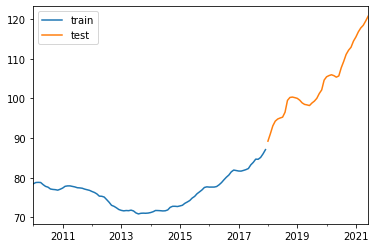

In [ ]:
split_date = pd.Timestamp('12-31-2017')

train = df.loc[:split_date, ['강남구_매매가']]
test = df.loc[split_date:, ['강남구_매매가']]

ax = train.plot()
test.plot(ax=ax)
plt.legend(['train', 'test'])

In [ ]:
# 데이터 확인
print(train.shape)
train.head()

(96, 1)


,강남구_매매가
2010-01-01,78.461622
2010-02-01,78.776422
2010-03-01,78.819029
2010-04-01,78.785497
2010-05-01,78.251006


In [ ]:
# 데이터 확인
print(test.shape)
test.head()

(42, 1)


,강남구_매매가
2018-01-01,89.211516
2018-02-01,91.075076
2018-03-01,93.061200
2018-04-01,94.252912
2018-05-01,94.788183


# MinMaxScaler
최대/최소값이 각각 1, 0이 되도록 스케일링

<center><img src="./image_files/boxplot.jfif" width = 300></center>

- 1	StandardScaler	기본 스케일. 평균과 표준편차 사용
- 2	MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 스케일링
- 3	MaxAbsScaler	최대절대값과 0이 각각 1, 0이 되도록 스케일링
- 4	RobustScaler	중앙값(median)과 IQR(interquartile range) 사용. 아웃라이어의 영향을 최소화

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()

train_sc = sc.fit_transform(train)
test_sc = sc.transform(test)

In [ ]:
train_sc_df = pd.DataFrame(train_sc, columns=['강남구_매매가'], index=train.index)
test_sc_df = pd.DataFrame(test_sc, columns=['강남구_매매가'], index=test.index)
train_sc_df.head()

,강남구_매매가
2010-01-01,0.468816
2010-02-01,0.488240
2010-03-01,0.490869
2010-04-01,0.488800
2010-05-01,0.455820


In [ ]:
train_sc_df

,강남구_매매가
2010-01-01,0.468816
2010-02-01,0.488240
2010-03-01,0.490869
2010-04-01,0.488800
2010-05-01,0.455820
...,...
2017-08-01,0.851997
2017-09-01,0.849980
2017-10-01,0.878215
2017-11-01,0.934006


In [ ]:
test_sc_df

,강남구_매매가
2018-01-01,1.132127
2018-02-01,1.247117
2018-03-01,1.369669
2018-04-01,1.443202
2018-05-01,1.476230
2018-06-01,1.492284
2018-07-01,1.505079
2018-08-01,1.581730
2018-09-01,1.766118
2018-10-01,1.811564


In [ ]:
test_sc_df.shape

(42, 13)

In [ ]:
# 슬라이딩 윈도우

for s in range(1, 13): 
    train_sc_df['shift_{}'.format(s)] = train_sc_df['강남구_매매가'].shift(s)
    test_sc_df['shift_{}'.format(s)] = test_sc_df['강남구_매매가'].shift(s)

train_sc_df.head(13)

,강남구_매매가,shift_1,shift_2,shift_3,shift_4,shift_5,shift_6,shift_7,shift_8,shift_9,shift_10,shift_11,shift_12
2010-01-01,0.468816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-01,0.488240,0.468816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-03-01,0.490869,0.488240,0.468816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-04-01,0.488800,0.490869,0.488240,0.468816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-01,0.455820,0.488800,0.490869,0.488240,0.468816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-06-01,0.428413,0.455820,0.488800,0.490869,0.488240,0.468816,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-07-01,0.416207,0.428413,0.455820,0.488800,0.490869,0.488240,0.468816,NaN,NaN,NaN,NaN,NaN,NaN
2010-08-01,0.387900,0.416207,0.428413,0.455820,0.488800,0.490869,0.488240,0.468816,NaN,NaN,NaN,NaN,NaN
2010-09-01,0.380940,0.387900,0.416207,0.428413,0.455820,0.488800,0.490869,0.488240,0.468816,NaN,NaN,NaN,NaN
2010-10-01,0.377328,0.380940,0.387900,0.416207,0.428413,0.455820,0.488800,0.490869,0.488240,0.468816,NaN,NaN,NaN


In [ ]:
# X_train : 12개 복사된 값, y_train : 실제 인덱스값[강남구_매매가]
X_train = train_sc_df.dropna().drop('강남구_매매가', axis=1)
y_train = train_sc_df.dropna()[['강남구_매매가']]

# test set : 은 2020년 1월 1일 부터 18개월치 데이터
X_test = test_sc_df.dropna().drop('강남구_매매가', axis=1)
y_test = test_sc_df.dropna()[['강남구_매매가']]

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

#(Train) NA 결측치를 제거하면서 2010년도 데이터 12개월치가 삭제  96행 -> 84행
#(Test) NA 결측치를 제거하면서 2019년도 데이터 12개월 치가 삭제  42행 -> 30행


(84, 12)
(84, 1)
(30, 12)
(30, 1)


In [ ]:
# 3차원 tensor를 사용하기 위해서 Numpy Array로 변환

print(type(X_train)) # 데이터 프레임
X_train = X_train.values
print(type(X_train)) # 배열
X_test= X_test.values

y_train = y_train.values
y_test = y_test.values

print(X_train.shape)
print(X_train)
print(y_train.shape)
print(y_train)

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
(84, 12)
[[0.38401128 0.36978347 0.37732766 ... 0.49086915 0.48824012 0.46881573]
 [0.40210555 0.38401128 0.36978347 ... 0.4888001  0.49086915 0.48824012]
 [0.42931643 0.40210555 0.38401128 ... 0.45581984 0.4888001  0.49086915]
 ...
 [0.8499802  0.851997   0.80176303 ... 0.67496874 0.68213632 0.65426068]
 [0.87821539 0.8499802  0.851997   ... 0.66729385 0.67496874 0.68213632]
 [0.93400648 0.87821539 0.8499802  ... 0.66581387 0.66729385 0.67496874]]
(84, 1)
[[0.40210555]
 [0.42931643]
 [0.43576981]
 [0.43602884]
 [0.42799478]
 [0.41991831]
 [0.40759169]
 [0.40476239]
 [0.39949184]
 [0.38593159]
 [0.3761093 ]
 [0.36640442]
 [0.34879638]
 [0.3338129 ]
 [0.31139253]
 [0.27654913]
 [0.27449106]
 [0.26241616]
 [0.22281739]
 [0.18193012]
 [0.13398173]
 [0.1184484 ]
 [0.0952405 ]
 [0.06835212]
 [0.05504527]
 [0.0474924 ]
 [0.05270702]
 [0.05025395]
 [0.05871418]
 [0.04606187]
 [0.0156098 ]
 [0.        ]
 [0.00969007]
 [0.01186534]
 

In [ ]:
# 3차원 tensor 형태로 broadcasting
X_train_t = X_train.reshape(X_train.shape[0], 1, 12) # (84, 12) -> (84, 1, 12)
X_test_t = X_test.reshape(X_test.shape[0], 1, 12) # (84, 1) -> (84, 1, 1)

print("Feature 변수 최종 DATA 구조 :", X_train_t.shape)
print("Target 값 최종 DATA 구조 :", y_test.shape)

Feature 변수 최종 DATA 구조 : (84, 1, 12)
Target 값 최종 DATA 구조 : (30, 1)


In [ ]:
n_step = 6
n_input = 12

# LSTM shape
n_lstm1 = 24
# n_lstm2 = 100

# fully connected
# n_hidden = 100
n_output = 1

In [ ]:
import tensorflow as tf

lstm_network = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape = (n_step, n_input)),    
    tf.keras.layers.LSTM(n_lstm1, return_sequences = True),
    
#     tf.keras.layers.LSTM(n_lstm2),    
#     tf.keras.layers.Dense(n_hidden),
    
    tf.keras.layers.Dense(n_output),
])

lstm_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 6, 24)             3552      
_________________________________________________________________
dense (Dense)                (None, 6, 1)              25        
Total params: 3,577
Trainable params: 3,577
Non-trainable params: 0
_________________________________________________________________


# Optimizer


[ref](https://velog.io/@yookyungkho/%EB%94%A5%EB%9F%AC%EB%8B%9D-%EC%98%B5%ED%8B%B0%EB%A7%88%EC%9D%B4%EC%A0%80-%EC%A0%95%EB%B3%B5%EA%B8%B0%EB%B6%80%EC%A0%9C-CS231n-Lecture7-Review)

In [ ]:
lstm_network.compile(optimizer = 'adam', 
                     loss = 'mean_squared_error', 
                     metrics = ['mse'])

## MSE(Mean Squared Error)

In [ ]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='loss', patience=1, verbose=1) # verbose 1 상세히 봄. 0 은 간략하게 봄.

history = lstm_network.fit(X_train_t, y_train, epochs=100,
          batch_size=12, verbose=1, callbacks=[early_stop],  validation_data=(X_test_t, y_test))  #callbacks=[history_logs],

Epoch 1/100
7/7 [==============================] - 1s 47ms/step - loss: 0.1700 - mse: 0.1700 - val_loss: 4.5545 - val_mse: 4.5545
Epoch 2/100
7/7 [==============================] - 0s 5ms/step - loss: 0.1269 - mse: 0.1269 - val_loss: 3.7897 - val_mse: 3.7897
Epoch 3/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0945 - mse: 0.0945 - val_loss: 3.0790 - val_mse: 3.0790
Epoch 4/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0652 - mse: 0.0652 - val_loss: 2.4486 - val_mse: 2.4486
Epoch 5/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0424 - mse: 0.0424 - val_loss: 1.8888 - val_mse: 1.8888
Epoch 6/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0282 - mse: 0.0282 - val_loss: 1.3921 - val_mse: 1.3921
Epoch 7/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0199 - mse: 0.0199 - val_loss: 0.9940 - val_mse: 0.9940
Epoch 8/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0153 - mse: 0.0153 - va

Epoch 57/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 58/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0412 - val_mse: 0.0412
Epoch 59/100
7/7 [==============================] - 0s 5ms/step - loss: 0.0024 - mse: 0.0024 - val_loss: 0.0427 - val_mse: 0.0427
Epoch 60/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0023 - mse: 0.0023 - val_loss: 0.0420 - val_mse: 0.0420
Epoch 61/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0406 - val_mse: 0.0406
Epoch 62/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0416 - val_mse: 0.0416
Epoch 63/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0022 - mse: 0.0022 - val_loss: 0.0413 - val_mse: 0.0413
Epoch 64/100
7/7 [==============================] - 0s 4ms/step - loss: 0.0021 - mse: 0.00

In [ ]:
train_score = lstm_network.evaluate(X_train_t, y_train, batch_size=12)
test_score = lstm_network.evaluate(X_test_t, y_test, verbose=True)

1/1 [==============================] - 0s 15ms/step - loss: 0.0385 - mse: 0.0385


Text(0.5, 1.0, '실제값 vs 예측값 : $Y$ vs $\\hat{Y}$')

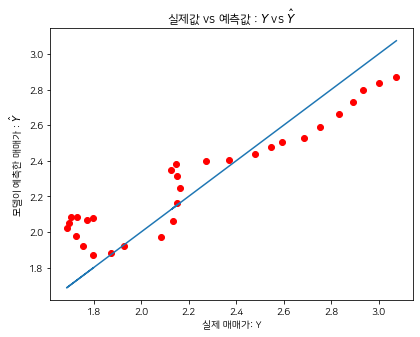

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# 폰트 설정
import matplotlib.font_manager as fm
path = 'C:\\Windows\\Fonts\\NanumSquareRoundB.ttf'
font_name = fm.FontProperties(fname=path).get_name()
plt.rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore') 

# 사이즈
plt.figure(figsize=(6.5, 5))


y_pred = lstm_network.predict(X_test_t, batch_size=12)
plt.scatter(y_test, y_pred, color='r')
plt.plot(y_test, y_test)

plt.xlabel("실제 매매가: Y")
plt.ylabel("모델이 예측한 매매가 : $\hat{Y}$")
plt.title("실제값 vs 예측값 : $Y$ vs $\hat{Y}$")

In [ ]:
split = pd.Timestamp('12-31-2018')
test_temp = df.loc[split:, ['강남구_매매가']]
test_temp.shape

(30, 1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
y_pred = pd.DataFrame(np.squeeze(y_pred))

sc = MinMaxScaler()
train_sc = sc.fit_transform(train)

y_pred = sc.inverse_transform(y_pred)
y_pred = pd.DataFrame(y_pred, index=test_temp.index)

In [ ]:
df['Time'] = df.index

In [ ]:
df

,강남구_매매가,강남구_전세가,서울_인허가물량,서울_미분양물량,NASDAQCOM,CSUSHPISA,HSN1F,INTDSRUSM193N,USSTHPI,M2,ICSA,Time
2010-01-01,78.461622,62.645190,3819.0,2508.0,2171.20,147.395,345.0,0.50,326.35,8481.3,496000.0,2010-01-01
2010-02-01,78.776422,63.511187,7527.0,4182.0,2171.20,145.630,336.0,0.75,326.35,8481.3,496000.0,2010-02-01
2010-03-01,78.819029,63.843571,21624.0,3414.0,2273.57,145.858,381.0,0.75,326.35,8507.9,488000.0,2010-03-01
2010-04-01,78.785497,64.321810,30459.0,3954.0,2402.58,146.401,422.0,0.75,323.41,8510.3,459000.0,2010-04-01
2010-05-01,78.251006,64.583027,37710.0,5094.0,2461.19,146.392,280.0,0.75,323.41,8550.0,451000.0,2010-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-01,116.768320,119.780834,30193.0,522.0,13403.39,241.610,823.0,0.25,484.26,19415.6,837000.0,2021-02-01
2021-03-01,117.751481,119.764355,55610.0,486.0,13588.83,245.547,873.0,0.25,484.26,19415.6,761000.0,2021-03-01
2021-04-01,118.411133,119.372967,82067.0,450.0,13480.11,249.846,796.0,0.25,510.08,19415.6,729000.0,2021-04-01
2021-05-01,119.494049,119.493505,95567.0,420.0,13962.68,254.382,720.0,0.25,510.08,19415.6,507000.0,2021-05-01


In [ ]:
y_pred

,0
2019-01-01,104.556923
2019-02-01,104.384781
2019-03-01,104.612740
2019-04-01,104.635643
2019-05-01,104.093407
2019-06-01,103.674774
2019-07-01,102.902039
2019-08-01,101.962494
2019-09-01,101.198486
2019-10-01,101.327919


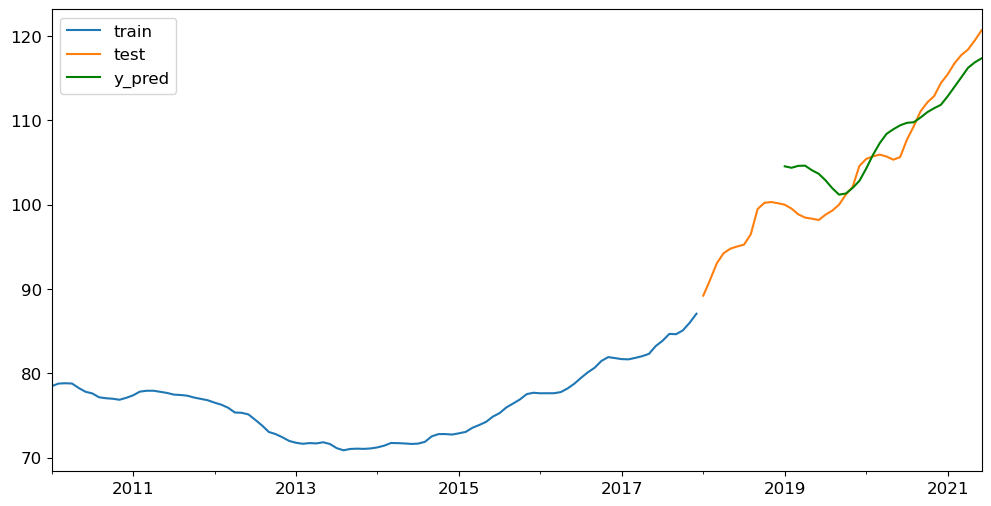

In [ ]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

split_date = pd.Timestamp('12-31-2017')

train = df.loc[:split_date, ['강남구_매매가']]
test = df.loc[split_date:, ['강남구_매매가']]

ax = train.plot()
test.plot(ax=ax)
y_pred.plot(ax=ax, color='green')

plt.legend(['train', 'test','y_pred'])

In [ ]:
print(train.shape)
print(test.shape)
print(y_pred.shape)

(96, 1)
(42, 1)
(30, 1)


In [ ]:
# train = np.squeeze(train)
# test = np.squeeze(test)

In [ ]:
compare = pd.concat([y_pred, test], axis=1, ).dropna()
compare.columns=['예측값', '실제값']
compare

,예측값,실제값
2019-01-01,104.556923,100.000000
2019-02-01,104.384781,99.542485
2019-03-01,104.612740,98.859205
2019-04-01,104.635643,98.473140
2019-05-01,104.093407,98.347338
2019-06-01,103.674774,98.182384
2019-07-01,102.902039,98.813794
2019-08-01,101.962494,99.296594
2019-09-01,101.198486,100.000104
2019-10-01,101.327919,101.203419


ref. https://keras.io/ko/callbacks/